In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# in each case below, append the name of the dataset.csv
web_path = 'https://www.openintro.org/data/csv' # url path to openintro.org data
loc_path = %pwd # local path if you had downloaded the data
loc_path += '/csv/' 

# Chapter 1

---

## `stent30`, `stent365`
page 8

In [2]:
p_30 = pd.read_csv(loc_path+"stent30.csv", header=0, names=['group', '0-30 days'])
p_365 = pd.read_csv(loc_path+"stent365.csv", header=0, names=['group', '0-365 days'])

one_one = p_30.merge(p_365, 
    on='group', 
    left_index=True,
    right_index=True
    ).set_index(np.arange(1, 452))

one_one.index.name = 'patient'
one_one.head()

,group,0-30 days,0-365 days
patient,,,
1,treatment,stroke,stroke
2,treatment,stroke,stroke
3,treatment,stroke,stroke
4,treatment,stroke,stroke
5,treatment,stroke,stroke


In [3]:
time_points = {
    '0-30':(p_30
            .pivot_table(index='group', 
            columns=['0-30 days'], 
            aggfunc=len)[::-1].T[::-1]),
            
    '0-365':(p_365
            .pivot_table(index='group', 
            columns=['0-365 days'], 
            aggfunc=len)[::-1].T[::-1])
    
} ## [::-1].T[::-1] to sort the table

one_two = pd.concat(
    time_points, 
    names=['days', 'outcome'],
    ).T

one_two

days        0-30           0-365         
outcome   stroke no event stroke no event
group                                    
treatment     33      191     45      179
control       13      214     28      199

---

## `email50`

page 10

In [4]:
one_three = pd.read_csv(
    loc_path+"email50.csv", 
    header=0)
one_three.head(3)

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,1,2012-01-04 05:19:16,0,0,0,no,...,0,0,21.705,551,1,1,0,0,8,small
1,0,0,1,0,0,2012-02-16 12:10:06,0,0,0,no,...,0,0,7.011,183,1,0,0,0,1,big
2,1,0,1,4,0,2012-01-04 07:36:23,0,2,0,no,...,0,0,0.631,28,0,0,0,0,2,none


---
## `county`
page 14

*Does not contain `fed_spend` column as is assumed in the book so I chart other variables*  


In [5]:
one_five = pd.read_csv(
    loc_path+"county.csv", 
    header=0)
one_five.head(3)

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial


## Below charts comparing `seaborn` and `matplotlib`

'% multi unit buildings% multi unit buildings'

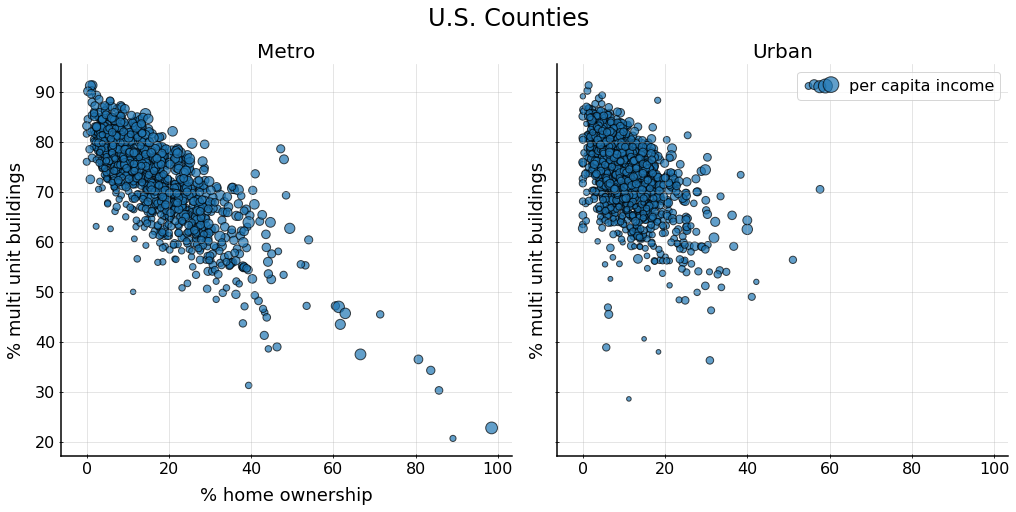

In [23]:
plt.style.use(['./matplotlibrc']) # this file sets our global settings for plotting(makes less bloated in the notebook)

fig, axes = ax1, ax2 = plt.subplots(1,2,sharey=True, sharex=True,constrained_layout=True)

zipped = list(zip(
    (axes),
    [one_five[one_five.metro == 'yes'], one_five[one_five.metro == 'no']],
    ['Metro','Urban'], 
    ['% multi unit buildings']*2,
    ['% home ownership', None]
))

for ax, df, title, y, x in zipped: 
    ax.scatter(data=df, y='homeownership', x='multi_unit', s=df['per_capita_income']/500, 
               alpha=0.7, label='per capita income'); 
    ax.set_title(title); ax.set_xlabel(x); ax.set_ylabel(y); 
    
axes[1].legend();
fig.suptitle('U.S. Counties');

## `seaborn`

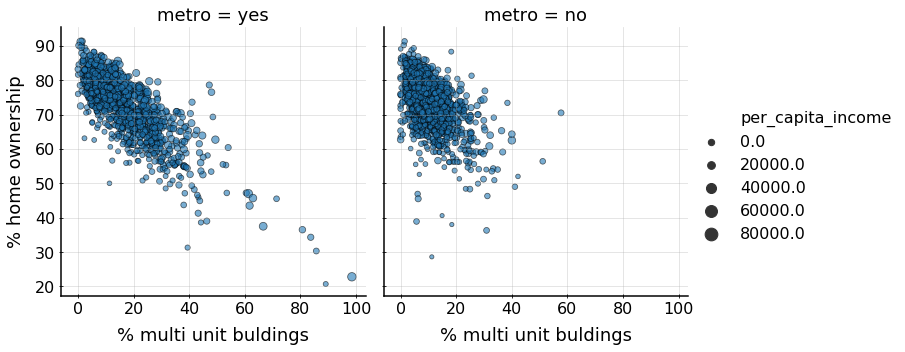

In [18]:
ax3 = sns.relplot(
    data=one_five,
    y="homeownership", 
    x="multi_unit", 
    col="metro",
    size='per_capita_income',
    alpha=.6, 
    edgecolor="black",
)
ax3.set_axis_labels('% multi unit buldings', '% home ownership');